In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve

In [3]:
#Loading Dataset
Data = pd.read_csv("data-breastCancer.csv")

In [4]:
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# checking unique values
Data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
#Dropping Features id and unnamed: 32
Data.drop(["id", "Unnamed: 32"], axis=1, inplace = True)
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# updating M=1 and B=0 in diagnosis feature

for i in range(len(Data["diagnosis"])):
    if Data["diagnosis"][i]=="M":
        Data["diagnosis"][i]=1
    else:
        Data["diagnosis"][i]=0

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10904/2500402202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["diagnosis"][i]=1
C:\Users\Vivek\AppData\Local\Temp/ipykernel_10904/2500402202.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["diagnosis"][i]=0


In [8]:
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# assigning dependent and independent variables
ind = Data.iloc[:,1:]
dep = Data.iloc[:,0]
dep = dep.astype('int')

In [14]:
#creating kfold object with 10 splits
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

In [15]:
#creating tree object from RandomForestClassifier class
tree = RandomForestClassifier(n_estimators=10, criterion="entropy")

In [16]:
#Finding accuracy from Confusion Matrix
def accuracy(x):
    return (x[0][0]+x[1][1])/np.sum(x)*100

In [17]:
tr=[]
te=[]
for train, test in kfold.split(Data):
    tr.append(train)
    te.append(test)

In [18]:
Tpr=[]
Fpr=[]
for i in range(len(tr)):
    inde = ind.loc[tr[i]].values
    depe = dep.loc[tr[i]].values
    tree.fit(inde,depe)
    pred = tree.predict(ind.loc[te[i]].values)
    conf_mtr = confusion_matrix(pred, dep.loc[te[i]].values)
    print(f"confusion matrix for {i+1} fold :", conf_mtr, "Accuracy is : ", round(accuracy(conf_mtr),2),"%")
    fpr, tpr, threshold = roc_curve(dep.loc[te[i]].values, pred)
    Tpr.append(tpr)
    Fpr.append(fpr)

confusion matrix for 1 fold : [[35  1]
 [ 0 21]] Accuracy is :  98.25 %
confusion matrix for 2 fold : [[32  1]
 [ 0 24]] Accuracy is :  98.25 %
confusion matrix for 3 fold : [[40  0]
 [ 1 16]] Accuracy is :  98.25 %
confusion matrix for 4 fold : [[37  1]
 [ 0 19]] Accuracy is :  98.25 %
confusion matrix for 5 fold : [[38  1]
 [ 1 17]] Accuracy is :  96.49 %
confusion matrix for 6 fold : [[34  5]
 [ 1 17]] Accuracy is :  89.47 %
confusion matrix for 7 fold : [[34  2]
 [ 0 21]] Accuracy is :  96.49 %
confusion matrix for 8 fold : [[33  5]
 [ 1 18]] Accuracy is :  89.47 %
confusion matrix for 9 fold : [[39  0]
 [ 0 18]] Accuracy is :  100.0 %
confusion matrix for 10 fold : [[31  2]
 [ 0 23]] Accuracy is :  96.43 %


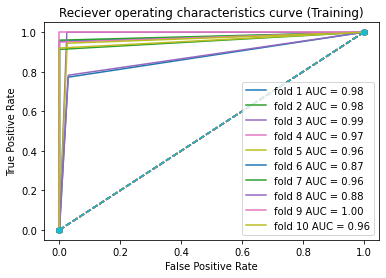

In [19]:
# Plotting ROC Curve 

for i in range(len(tr)):
    plt.plot(Fpr[i],Tpr[i],label = 'fold %i AUC = %0.2f' % (i+1,auc(Fpr[i],Tpr[i])))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'h--')
    plt.title("Reciever operating characteristics curve (Training)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")